In [5]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import h5py

In [8]:
dem = np.loadtxt('lotka_dem.txt')

In [9]:
euler = np.loadtxt('lotka_euler.txt')

In [25]:
def lotka(t, x):
    y = np.empty(x.shape)
    y[0] =  x[0] - x[0]*x[1]
    y[1] = -x[1] + x[0]*x[1]
    return y

sol = scipy.integrate.solve_ivp(lotka, [0, 25], [2.0, 1.0], rtol=1e-6, atol=1e-6, dense_output=True)

def l2_error(true_sol, sol_data):
    t_list = sol_data[:, 0]
    y_true = true_sol.sol(t_list)
    return np.sqrt(np.average(np.linalg.norm(sol_data[:, 1:] - y_true.T, axis=1) ** 2 / 2))



In [18]:
time_array

'build/clock.txt'

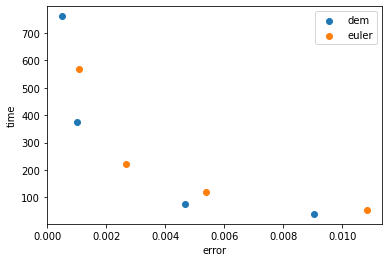

In [34]:
base_load_dir = 'build'
time_array = np.loadtxt(f'{base_load_dir}/clock.txt')
total_index = 4
t_list_dem = []
error_list_dem = []
t_list_euler = []
error_list_euler = []

for i in range(total_index):
    dem = np.loadtxt(f'{base_load_dir}/lotka_dem{i}.txt')
    euler = np.loadtxt(f'{base_load_dir}/lotka_euler{i}.txt')
    error_dem = l2_error(sol, dem)
    error_euler = l2_error(sol, euler)
    time_dem = time_array[i, 0]
    time_euler = time_array[i, 1]
    error_list_dem.append(error_dem)
    error_list_euler.append(error_euler)
    t_list_dem.append(time_dem)
    t_list_euler.append(time_euler)

plt.scatter(error_list_dem, t_list_dem, label='dem')
plt.scatter(error_list_euler, t_list_euler, label='euler')
plt.xlabel('error')
plt.ylabel('time')
plt.legend()
plt.show()

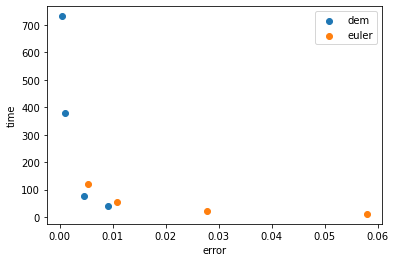

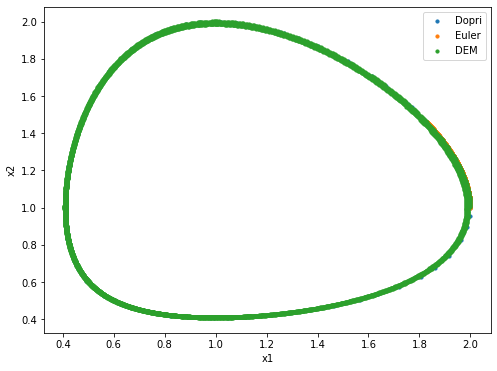

In [23]:
dem = np.loadtxt(f'{base_load_dir}/lotka_dem3.txt')
euler = np.loadtxt(f'{base_load_dir}/lotka_euler3.txt')
plt.figure(num="pic",figsize=(8,6))
plt.scatter(sol.y[0,:],sol.y[1,:], s=10, label="Dopri")
plt.scatter(euler[:2000,1],euler[:2000,2],s=10, label="Euler")
plt.scatter(dem[:,1],dem[:,2],s=10, label="DEM")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

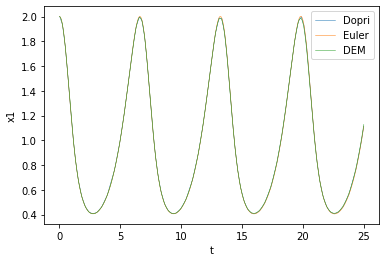

In [24]:
plt.figure(num="Comparison")
plt.plot(sol.t,sol.y[0,:], lw=0.5, label="Dopri")
plt.plot(euler[:,0],euler[:,1],lw=0.5, label="Euler")
plt.plot(dem[:,0],dem[:,1],lw=0.5, label="DEM")
plt.xlabel("t")
plt.ylabel("x1")
plt.legend()
plt.show()